In [1]:
!pip install librosa

In [2]:
import zipfile
path = '/content/archive(1).zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/content/audio_files')

In [6]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Model used is Logistic Regression



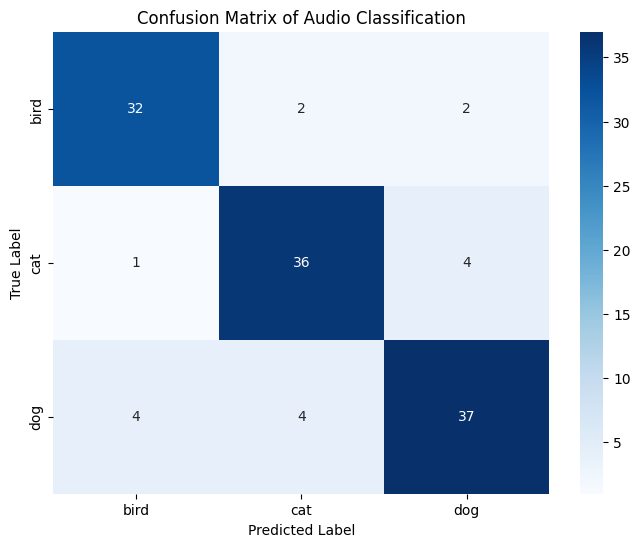

              precision    recall  f1-score   support

        bird       0.86      0.89      0.88        36
         cat       0.86      0.88      0.87        41
         dog       0.86      0.82      0.84        45

    accuracy                           0.86       122
   macro avg       0.86      0.86      0.86       122
weighted avg       0.86      0.86      0.86       122



In [7]:
# Define the base directory where the unzipped files are stored
data_dir = '/content/audio_files/Animals/'  # Base folder containing Dog, Cat, Bird folders

# Define a function to extract features from audio files (e.g., MFCC)
def extract_features(file_name):
    # Load the audio file
    audio, sample_rate = librosa.load(file_name, sr=None)

    # Extract MFCCs (a common feature for audio classification)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

    # Take the mean of MFCCs along the time axis
    mfccs_mean = np.mean(mfccs.T, axis=0)

    return mfccs_mean

# Prepare the dataset
X = []
y = []

# Loop through each subfolder (Dog, Cat, Bird) and extract features
for animal in ['dog', 'cat', 'bird']:
    animal_folder = os.path.join(data_dir, animal)

    # List all audio files in the folder
    files = os.listdir(animal_folder)

    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(animal_folder, file)

            # Extract features and append to the feature list
            features = extract_features(file_path)
            X.append(features)
            y.append(animal)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode labels (convert text labels to numerical labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted labels back to original text labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Print the classification report
print("Model used is Logistic Regression\n")
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Audio Classification')
plt.show()
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))